# Lithium Ion Battery capacity estimation using Autoencoders and Ensemble Learning

##### Author: Susmitha Ganesh

#### Understanding data from metadata.csv ([link](https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset))

Data Source: Kaggle Battery Dataset

In [ ]:
# Read metadata.csv file from folder location on computer
# And display the top 5 rows

import pandas as pd
df = pd.read_csv('/Users/susmithaganesh/Desktop/Project/Data/Data_on_drive/metadata.csv');
df.head(5)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


Charge cycle, discharge cycle and impedence test are performed on multiple 18650 batteries. The capcaity is determined in the discharge cycle. The tests seem to be performed at vairious temperatures. As a result of imperdence test (EIS test) internal resistance (Re) and charge transfer resistance (Rct) are determined.


NOTE: The paper focuses on capacity estimation. Hence Re and Rct shall be ignored for now..

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


Capacity, Re and Rct have some null values this is because the capacity is tested after every complete charge cycle at the start of a discharge cycle. and Re and Rct are determined in impedence tests (EIS tests) only.  

In [ ]:
Num_batteries = df['battery_id'].value_counts()
Num_batteries

battery_id
B0007    616
B0005    616
B0006    616
B0033    486
B0036    486
B0034    486
B0018    319
B0044    275
B0043    275
B0042    275
B0054    253
B0056    252
B0055    252
B0047    184
B0048    184
B0045    184
B0046    184
B0041    163
B0053    137
B0040    122
B0039    122
B0038    122
B0030     97
B0029     97
B0031     97
B0032     97
B0026     80
B0025     80
B0028     80
B0027     80
B0049     62
B0052     62
B0051     62
B0050     62
Name: count, dtype: int64

There are 34, 18650 batteries on which the tests are performed and there are individual files for each cycle test.

<b> Determine the temperatures at which tests were performed on vairous battery packs  </b>

In [ ]:
B0018_df = df[df['battery_id'] == 'B0018']
B0018_df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
6352,charge,[2008. 7. 7. 12. 26. 45.75],24,B0018,0,6353,06353.csv,NaN,NaN,NaN
6353,impedance,[2008. 7. 7. 14. 43. ...,24,B0018,1,6354,06354.csv,NaN,0.06515815158455215,0.09555369570022001
6354,discharge,[2008. 7. 7. 15. 15. ...,24,B0018,2,6355,06355.csv,1.8550045207910817,NaN,NaN


In [ ]:
B0005_df = df[df['battery_id'] == 'B0005']
B0005_df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
5120,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,B0005,0,5121,05121.csv,NaN,NaN,NaN
5121,discharge,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,24,B0005,1,5122,05122.csv,1.8564874208181574,NaN,NaN
5122,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.6000e+01 3...,24,B0005,2,5123,05123.csv,NaN,NaN,NaN


In [ ]:
B0005_TempValues = B0005_df['ambient_temperature'].value_counts()
B0005_TempValues

ambient_temperature
24    616
Name: count, dtype: int64

In [ ]:
B0006_df = df[df['battery_id'] == 'B0006']
B0006_df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
4504,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,B0006,0,4505,04505.csv,NaN,NaN,NaN
4505,discharge,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,24,B0006,1,4506,04506.csv,2.035337591005598,NaN,NaN
4506,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.6000e+01 3...,24,B0006,2,4507,04507.csv,NaN,NaN,NaN


In [ ]:
B0006_TempValues = B0006_df['ambient_temperature'].value_counts()
B0006_TempValues

ambient_temperature
24    616
Name: count, dtype: int64

In [ ]:
B0007_df = df[df['battery_id'] == 'B0007']
B0007_df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
5736,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,B0007,0,5737,05737.csv,NaN,NaN,NaN
5737,discharge,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,24,B0007,1,5738,05738.csv,1.89105229539079,NaN,NaN
5738,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.6000e+01 3...,24,B0007,2,5739,05739.csv,NaN,NaN,NaN


In [ ]:
B0007_TempValues = B0007_df['ambient_temperature'].value_counts()
B0007_TempValues

ambient_temperature
24    616
Name: count, dtype: int64

In [ ]:
B0047_df = df[df['battery_id'] == 'B0047']
B0047_df.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN


In [ ]:
B0047_TempValues = B0047_df['ambient_temperature'].value_counts()
B0047_TempValues

ambient_temperature
4     144
24     40
Name: count, dtype: int64

The paper displays the capacity degradation curve for four batteries B0005,B0006,B0007 and B0018. The above code sinippts are an effort to understand the vairous ambient temperatures at which the cycling of these 4 batteries were performed.
* B00005 => 24degC
* B00006 => 24degC
* B00007 => 24degC
* B00018 => 24degC
* B00047 => 24degC & 4degC


<b> Determine the file numbers for charge for batteries </b>

In [ ]:
idx_B0005_charge = df['filename'].loc[(df['battery_id']== 'B0005') & (df['type']== 'charge')]
idx_B0005_charge

5120    05121.csv
5122    05123.csv
5124    05125.csv
5126    05127.csv
5128    05129.csv
          ...    
5721    05722.csv
5725    05726.csv
5729    05730.csv
5732    05733.csv
5735    05736.csv
Name: filename, Length: 170, dtype: object

In [ ]:
import numpy as np
idx_B0005_charge_npy = idx_B0005_charge.to_numpy()
type(idx_B0005_charge_npy)


numpy.ndarray

In [ ]:
import numpy as np
np.save('/Users/susmithaganesh/Desktop/Project/Data/Identified_indices/idx_B0005_charge', idx_B0005_charge_npy)

In [ ]:
idx_B0006_charge = df['filename'].loc[(df['battery_id']== 'B0006') & (df['type']== 'charge')]
idx_B0006_charge

4504    04505.csv
4506    04507.csv
4508    04509.csv
4510    04511.csv
4512    04513.csv
          ...    
5105    05106.csv
5109    05110.csv
5113    05114.csv
5116    05117.csv
5119    05120.csv
Name: filename, Length: 170, dtype: object

In [ ]:
import numpy as np
idx_B0006_charge_npy = idx_B0006_charge.to_numpy()
type(idx_B0006_charge_npy)


numpy.ndarray

In [ ]:
np.save('/Users/susmithaganesh/Desktop/Project/Data/Identified_indices/idx_B0006_charge', idx_B0006_charge_npy)


In [ ]:
idx_B0007_charge = df['filename'].loc[(df['battery_id']== 'B0007') & (df['type']== 'charge')]
idx_B0007_charge

5736    05737.csv
5738    05739.csv
5740    05741.csv
5742    05743.csv
5744    05745.csv
          ...    
6337    06338.csv
6341    06342.csv
6345    06346.csv
6348    06349.csv
6351    06352.csv
Name: filename, Length: 170, dtype: object

In [ ]:
idx_B0007_charge_npy = idx_B0007_charge.to_numpy()
type(idx_B0007_charge_npy)

numpy.ndarray

In [ ]:
np.save('/Users/susmithaganesh/Desktop/Project/Data/Identified_indices/idx_B0007_charge', idx_B0007_charge_npy)

In [ ]:
idx_B0018_charge = df['filename'].loc[(df['battery_id']== 'B0018') & (df['type']== 'charge')]
idx_B0018_charge

6352    06353.csv
6356    06357.csv
6360    06361.csv
6364    06365.csv
6368    06369.csv
          ...    
6659    06660.csv
6661    06662.csv
6663    06664.csv
6667    06668.csv
6669    06670.csv
Name: filename, Length: 134, dtype: object

In [ ]:
idx_B0018_charge_npy = idx_B0018_charge.to_numpy()
type(idx_B0018_charge_npy)

numpy.ndarray

In [ ]:
np.save('/Users/susmithaganesh/Desktop/Project/Data/Identified_indices/idx_B0018_charge', idx_B0018_charge_npy)

<b> Determine the file numbers for discharge for batteries </b>

In [ ]:
filename_B0005_discharge = df['filename'].loc[(df['battery_id']== 'B0005') & (df['type']== 'discharge')]
filename_B0005_discharge

5121    05122.csv
5123    05124.csv
5125    05126.csv
5127    05128.csv
5129    05130.csv
          ...    
5719    05720.csv
5723    05724.csv
5727    05728.csv
5731    05732.csv
5733    05734.csv
Name: filename, Length: 168, dtype: object

In [ ]:
filename_B0006_discharge = df['filename'].loc[(df['battery_id']== 'B0006') & (df['type']== 'discharge')]
filename_B0006_discharge

4505    04506.csv
4507    04508.csv
4509    04510.csv
4511    04512.csv
4513    04514.csv
          ...    
5103    05104.csv
5107    05108.csv
5111    05112.csv
5115    05116.csv
5117    05118.csv
Name: filename, Length: 168, dtype: object

In [ ]:
filename_B0007_discharge = df['filename'].loc[(df['battery_id']== 'B0007') & (df['type']== 'discharge')]
filename_B0007_discharge

5737    05738.csv
5739    05740.csv
5741    05742.csv
5743    05744.csv
5745    05746.csv
          ...    
6335    06336.csv
6339    06340.csv
6343    06344.csv
6347    06348.csv
6349    06350.csv
Name: filename, Length: 168, dtype: object

In [ ]:
filename_B0018_discharge = df['filename'].loc[(df['battery_id']== 'B0018') & (df['type']== 'discharge')]
filename_B0018_discharge

6354    06355.csv
6358    06359.csv
6362    06363.csv
6366    06367.csv
6369    06370.csv
          ...    
6660    06661.csv
6662    06663.csv
6665    06666.csv
6668    06669.csv
6670    06671.csv
Name: filename, Length: 132, dtype: object

In [ ]:
filename_B0047_discharge = df['filename'].loc[(df['battery_id']== 'B0047') & (df['type']== 'discharge')]
filename_B0047_discharge

0      00001.csv
4      00005.csv
6      00007.csv
8      00009.csv
10     00011.csv
         ...    
172    00173.csv
174    00175.csv
176    00177.csv
178    00179.csv
180    00181.csv
Name: filename, Length: 72, dtype: object

To plot the capacity degradation of B0005

In [ ]:
B0005_df_Cap = B0005_df[['type','battery_id','test_id','uid','filename','Capacity']]
B0005_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity
5120,charge,B0005,0,5121,05121.csv,NaN
5121,discharge,B0005,1,5122,05122.csv,1.8564874208181574
5122,charge,B0005,2,5123,05123.csv,NaN


In [ ]:
B0005_df_Cap = B0005_df_Cap.loc[B0005_df_Cap['Capacity'].notnull()]
B0005_df_Cap['Capacity'] = B0005_df_Cap['Capacity'].round(3)
B0005_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity,SOHC
5121,discharge,B0005,1,5122,05122.csv,1.8564874208181574,100.000
5123,discharge,B0005,3,5124,05124.csv,1.846327249719927,99.453
5125,discharge,B0005,5,5126,05126.csv,1.8353491942234077,98.861


In [ ]:
B0005_df_Cap.count()

type          168
battery_id    168
test_id       168
uid           168
filename      168
Capacity      168
SOHC          168
dtype: int64

In [ ]:
B0005_df_Cap['SOHC'] = (B0005_df_Cap['Capacity'].astype(float)* 100)/1.8564874208181574
B0005_df_Cap['SOHC'] = B0005_df_Cap['SOHC'].round(3)
B0005_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity,SOHC
5121,discharge,B0005,1,5122,05122.csv,1.8564874208181574,100.000
5123,discharge,B0005,3,5124,05124.csv,1.846327249719927,99.453
5125,discharge,B0005,5,5126,05126.csv,1.8353491942234077,98.861


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

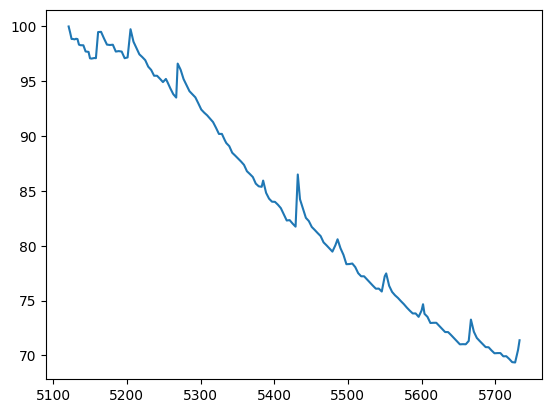

In [ ]:
plt.plot(B0005_df_Cap['SOHC'])
plt.show()

In [ ]:
1.8021069*100/1.8564874208181574

97.07078430974815

In [ ]:
B0007_df_Cap = B0007_df[['type','battery_id','test_id','uid','filename','Capacity']]
B0007_df_Cap = B0007_df_Cap.loc[B0007_df_Cap['Capacity'].notnull()]
B0007_df_Cap['Capacity'] = B0007_df_Cap['Capacity'].round(3)
B0007_df_Cap['SOHC'] = (B0007_df_Cap['Capacity'].astype(float)* 100)/1.891052295
B0007_df_Cap['SOHC'] = B0007_df_Cap['SOHC'].round(3)
B0007_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity,SOHC
5737,discharge,B0007,1,5738,05738.csv,1.891052295,100.000
5739,discharge,B0007,3,5740,05740.csv,1.880637027686859,99.449
5741,discharge,B0007,5,5742,05742.csv,1.8806626717011388,99.451


In [ ]:
B0047_df_Cap = B0047_df[['type','battery_id','test_id','uid','filename','Capacity']]
B0047_df_Cap = B0047_df_Cap.loc[B0047_df_Cap['Capacity'].notnull()]
B0047_df_Cap['Capacity'] = B0047_df_Cap['Capacity'].round(3)
B0047_df_Cap['SOHC'] = (B0047_df_Cap['Capacity'].astype(float)* 100)/1.6743047446975208
B0047_df_Cap['SOHC'] = B0047_df_Cap['SOHC'].round(3)
B0047_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity,SOHC
0,discharge,B0047,0,1,00001.csv,1.6743047446975208,100.000
4,discharge,B0047,4,5,00005.csv,1.5243662105099023,91.045
6,discharge,B0047,6,7,00007.csv,1.5080762969973425,90.072


In [ ]:
B0018_df_Cap = B0018_df[['type','battery_id','test_id','uid','filename','Capacity']]
B0018_df_Cap = B0018_df_Cap.loc[B0018_df_Cap['Capacity'].notnull()]
B0018_df_Cap['Capacity'] = B0018_df_Cap['Capacity'].round(3)
B0018_df_Cap['SOHC'] = (B0018_df_Cap['Capacity'].astype(float)* 100)/1.8550045207910817
B0018_df_Cap['SOHC'] = B0018_df_Cap['SOHC'].round(3)
B0018_df_Cap.head(3)

,type,battery_id,test_id,uid,filename,Capacity,SOHC
6354,discharge,B0018,2,6355,06355.csv,1.8550045207910817,100.000
6358,discharge,B0018,6,6359,06359.csv,1.8431955317089987,99.363
6362,discharge,B0018,10,6363,06363.csv,1.8396018424355423,99.170


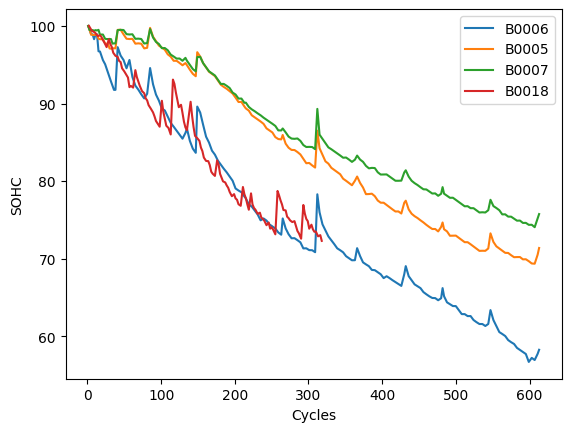

In [ ]:
B0006_df_Cap = B0006_df[['type','battery_id','test_id','uid','filename','Capacity']]
B0006_df_Cap = B0006_df_Cap.loc[B0006_df_Cap['Capacity'].notnull()]
B0006_df_Cap['Capacity'] = B0006_df_Cap['Capacity'].round(3)
B0006_df_Cap['SOHC'] = (B0006_df_Cap['Capacity'].astype(float)* 100)/2.035337591005598
B0006_df_Cap['SOHC'] = B0006_df_Cap['SOHC'].round(3)
# B0006_df_Cap.head(3)
plt.plot(B0006_df_Cap['test_id'],B0006_df_Cap['SOHC'])
plt.plot(B0005_df_Cap['test_id'],B0005_df_Cap['SOHC'])
plt.plot(B0007_df_Cap['test_id'],B0007_df_Cap['SOHC'])
plt.plot(B0018_df_Cap['test_id'],B0018_df_Cap['SOHC'])
plt.xlabel('Cycles')
plt.ylabel('SOHC')
plt.legend(['B0006', 'B0005', 'B0007', 'B0018'])
plt.show()


In [ ]:
def ext_SOHC_and_Plot (df):
    Num_batteries = df['battery_id'].value_counts().count()
    Num_batteries_list = df['battery_id'].drop_duplicates()

    for i in range(Num_batteries):
        df_temp = df[['type','battery_id','test_id','uid','filename','Capacity']].loc[(df['battery_id']== Num_batteries_list.iloc[i])]
        # print(df_temp.head(3))
        df_temp_Cap = df_temp.loc[df_temp['Capacity'].notnull()]
        # print(df_temp_Cap.head(3))
        # print(df_temp_Cap['Capacity'].count())
        denominator = float(df_temp_Cap['Capacity'].iloc[0])
        # if not df_temp_Cap.empty:
        df_temp_Cap['SOHC'] = df_temp_Cap['Capacity'].astype(float)*100
        # df_temp['Capacity'][0]
        # print(float(df_temp_Cap['Capacity'].iloc[0]))
        # print(denominator)
        print(df_temp_Cap.head(3))




In [ ]:
ext_SOHC_and_Plot(df)

        type battery_id  test_id  uid   filename            Capacity  \
0  discharge      B0047        0    1  00001.csv  1.6743047446975208   
4  discharge      B0047        4    5  00005.csv  1.5243662105099023   
6  discharge      B0047        6    7  00007.csv  1.5080762969973425   

         SOHC  
0  167.430474  
4  152.436621  
6  150.807630  
          type battery_id  test_id  uid   filename            Capacity  \
184  discharge      B0045        0  185  00185.csv  1.0819793880779518   
188  discharge      B0045        4  189  00189.csv         0.927952405   
190  discharge      B0045        6  191  00191.csv         0.885193608   

           SOHC  
184  108.197939  
188   92.795240  
190   88.519361  
          type battery_id  test_id  uid   filename            Capacity  \
368  discharge      B0048        0  369  00369.csv  1.6579955793677608   
372  discharge      B0048        4  373  00373.csv  1.5076933476098775   
374  discharge      B0048        6  375  00375.csv  1.49

/var/folders/3p/hbpqj3zd5jjb2zgpw9txfmkc0000gn/T/ipykernel_10898/1117782721.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_Cap['SOHC'] = df_temp_Cap['Capacity'].astype(float)*100
/var/folders/3p/hbpqj3zd5jjb2zgpw9txfmkc0000gn/T/ipykernel_10898/1117782721.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_Cap['SOHC'] = df_temp_Cap['Capacity'].astype(float)*100
/var/folders/3p/hbpqj3zd5jjb2zgpw9txfmkc0000gn/T/ipykernel_10898/1117782721.py:13: SettingWithCopyWarning: 
A value is trying 

ValueError: could not convert string to float: '[]'

In [ ]:
Num_batteries_list.iloc[1]

'B0045'

In [ ]:
Num_batteries = df['battery_id'].value_counts().count()
print(Num_batteries)


34


In [ ]:
Num_batteries_list = df['battery_id'].drop_duplicates()
print(type(Num_batteries_list.iloc[0]))
print(Num_batteries_list.iloc[0])

<class 'str'>
B0047
